In [38]:
import os
import cv2 
from os import listdir
import csv
from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as pyplot
from sklearn.svm import SVC
import joblib

In [3]:
# to load the data sampels enter the pathes of the folders

back='/Users/modyf/Desktop/prob3/SVM_Segmentation/background/'
inner='/Users/modyf/Desktop/prob3/SVM_Segmentation/inner_cell/'
outer='/Users/modyf/Desktop/prob3/SVM_Segmentation/outer_cell/'

backa = []  
            
for dirName, subdirList, fileList in os.walk(back):
    for filename in fileList:
        if ".jpg" in filename.lower():  # check whether the file's DICOM
            namedir=[os.path.splitext(filename)[0],os.path.join(dirName,filename)]
            backa.append(namedir)

outera = []  # create an empty list

for dirName, subdirList, fileList in os.walk(outer):
    for filename in fileList:
        if ".jpg" in filename.lower():  # check whether the file's DICOM
            namedir=[os.path.splitext(filename)[0],os.path.join(dirName,filename)]
            outera.append(namedir)
            
innera = []  # create an empty list

for dirName, subdirList, fileList in os.walk(inner):
    for filename in fileList:
        if ".jpg" in filename.lower():  # check whether the file's DICOM
            namedir=[os.path.splitext(filename)[0],os.path.join(dirName,filename)]
            innera.append(namedir)

In [4]:
#Generate the labels for each data sample(background,inner_cell,outer_cell)
#we insert the pixels in order each data sample grouped together
#with each pixel read we insert a label of (0) if it is background,(1) if it is outer_cell,(2) if it is inner_cell
#generate pixel_list(X_Train) during each itration from different data sample (background,inner_cell,outer_cell)
pixel_list=[]
Labels = [ ]
dim=(65,65)
for i in range(len(backa)):
    img = cv2.imread(backa[i][1])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img=img.reshape(-1,3)     
    for i in img:
        pixel_list.append(i/255)
        Labels.append(0)

for i in range(len(outera)):
    img = cv2.imread(outera[i][1])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img=img.reshape(-1,3)     
    for i in img:
        pixel_list.append(i/255)
        Labels.append(1)

for i in range(len(innera)):
    img = cv2.imread(innera[i][1])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img=img.reshape(-1,3)     
    for i in img:
        pixel_list.append(i/255)
        Labels.append(2)

[['001', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/001.JPG'], ['002', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/002.JPG'], ['003', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/003.JPG'], ['004', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/004.JPG'], ['005', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/005.JPG'], ['006', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/006.JPG'], ['007', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/007.JPG'], ['008', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/008.JPG'], ['009', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/009.JPG'], ['010', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/010.JPG'], ['011', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/011.JPG'], ['012', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/012.JPG'], ['013', '/Users/modyf/Desktop/prob3/SVM_Segmentation/background/013.JPG'], ['014', '/Users/modyf/De

In [33]:
#Test Image
## to load the test image enter the path of the test image
path='/Users/modyf/Desktop/Pattern Midterm/segmentation_WBC-master/Dataset_1/002.bmp'
img = cv2.imread(path)
list_1=[]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
xsize=int(img.shape[0])
ysize=int(img.shape[1])
    
img=img.reshape(-1,3)     
for i in img:
    list_1.append(i/255)

(65, 65, 3)
(4225, 3)


In [26]:
#using SVC lib fit pixel_list with Labels
svclassifier = SVC(kernel='linear')
svclassifier.fit(pixel_list, Labels) #pixel_list= X_Train

SVC(kernel='linear')

In [34]:
y_pred = svclassifier.predict(list_1)

In [35]:
unique, counts = np.unique(y_pred, return_counts=True, axis = 0)

print (np.asarray((unique, counts)).T)

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
#checking y_pred values 
#if y_pred=0 take the corresponding pixel in test image and append it in the background list 
#if y_pred=1 take the corresponding pixel in test image and append it in the outer_cell list 
#if y_pred=2 take the corresponding pixel in test image and append it in the inner_cell list 
# then get the mean of these lists
Back_list=[]
inner_list=[]
outer_list=[]

for i in range(len(list_1)):
  
    if(y_pred[i] ==0):
        Back_list.append(list_1[i])
    if(y_pred[i] ==1):
        outer_list.append(list_1[i])
    if(y_pred[i] ==2):
        inner_list.append(list_1[i])
        
    back_pix=np.mean(Back_list, axis=0)
    inner_pix=np.mean(inner_list, axis=0)
    outer_pix=np.mean(outer_list, axis=0)


C:\Users\modyf\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\modyf\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


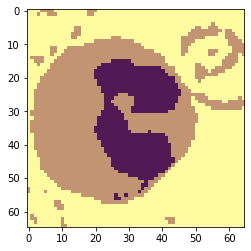

In [37]:
#Draw the output image 
output = np.zeros((xsize,ysize,3),dtype=np.uint8)
inc=0
for i in range(xsize):
    for j in range(ysize):
        if(y_pred[inc]==0):
            output[i,j]=back_pix *255

        if(y_pred[inc]==1):
            output[i,j]= outer_pix*255

        if(y_pred[inc]==2):
            output[i,j]=inner_pix *255

        inc+=1   
            
plt.imshow(output)


In [40]:
#saving model
filename = 'P3_model.sav'
joblib.dump(svclassifier, filename)

['P3_model.sav']

In [42]:
#loading model
loaded_model = joblib.load(filename)
loaded_model.predict(list_1)

array([0, 0, 0, ..., 0, 0, 0])